In [1]:
import os
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

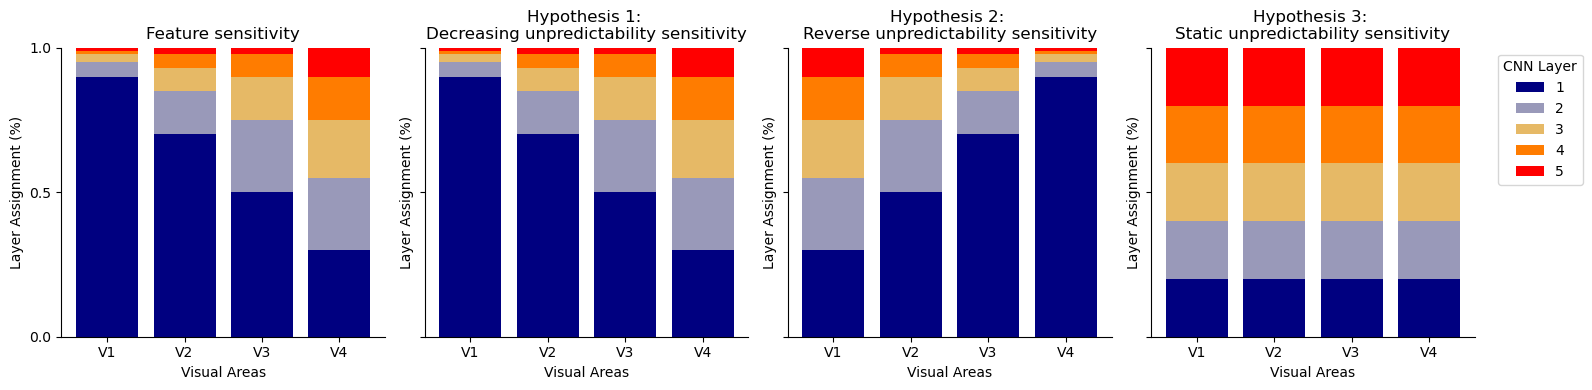

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# New data for Layer 1 as Hypothesis 1
hypothesis_1 = [
    [0.9, 0.05, 0.03, 0.01, 0.01],
    [0.7, 0.15, 0.08, 0.05, 0.02],
    [0.5, 0.25, 0.15, 0.08, 0.02],
    [0.3, 0.25, 0.2, 0.15, 0.1]
]

# Adjusting values for Hypothesis 2 (decreasing)
hypothesis_2 = [
    [0.9, 0.05, 0.03, 0.01, 0.01],
    [0.7, 0.15, 0.08, 0.05, 0.02],
    [0.5, 0.25, 0.15, 0.08, 0.02],
    [0.3, 0.25, 0.2, 0.15, 0.1]
]

# Inverting values for Hypothesis 3
hypothesis_3 = [
    [0.3, 0.25, 0.2, 0.15, 0.1],
    [0.5, 0.25, 0.15, 0.08, 0.02],
    [0.7, 0.15, 0.08, 0.05, 0.02],
    [0.9, 0.05, 0.03, 0.01, 0.01]
]

# Keeping the same values for Hypothesis 4
hypothesis_4 = [
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.2, 0.2, 0.2, 0.2, 0.2]
]

hypotheses = [hypothesis_1, hypothesis_2, hypothesis_3, hypothesis_4]

# Visual areas
visual_areas = ['V1', 'V2', 'V3', 'V4']

# Define a gradient colormap from dark blue to light red
cmap = LinearSegmentedColormap.from_list('NavyBlueBrightRed', ['#000080', '#FF0000'], N=5)
cmap = LinearSegmentedColormap.from_list('NavyBlueGreenRed', ['#000080', '#008000', '#FF0000'], N=5)
cmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000080', '#CCCCCC', '#FFA500', '#FF0000'], N=5)


# Plotting
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

# Iterate over hypotheses
for i, hypothesis in enumerate(hypotheses):
    ax = axs[i]
    # Transpose the hypothesis so that each vector becomes a column
    hypothesis_t = np.transpose(hypothesis)
    bottom = np.zeros(len(hypothesis_t[0]))
    for j, data in enumerate(hypothesis_t):
        ax.bar(range(len(data)), data, bottom=bottom, edgecolor='none', linewidth=0.5, label=f'{j+1}', color=cmap(j))
        bottom += data
    ax.set_title(['Feature sensitivity', 'Hypothesis 1: \nDecreasing unpredictability sensitivity', 'Hypothesis 2: \nReverse unpredictability sensitivity', 'Hypothesis 3: \nStatic unpredictability sensitivity'][i])
    ax.set_ylim(0, 1)  # Adjust the y-axis limits based on your data range
    ax.set_yticks([0, 0.5, 1])  # Set y-ticks
    ax.set_ylabel('Layer Assignment (%)')
    ax.set_xlabel('Visual Areas')
    ax.spines['top'].set_visible(False)  # Remove top border
    ax.spines['right'].set_visible(False)  # Remove right border
    ax.set_xticks(range(len(visual_areas)))  # Set x-ticks
    ax.set_xticklabels(visual_areas)  # Set x-tick labels
    ax.grid(False)  # Remove grid

# Remove 'Category' label from the bottom
fig.text(0.5, 0, '', ha='center', va='center', fontsize=12)

# Add a color legend
axs[-1].legend(title='CNN Layer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [2]:
from funcs.imgproc import get_imgs_designmx, show_stim, get_rms_contrast, get_contrast_df, get_img_prf
from funcs.rf_tools import get_mask, css_gaussian_cut, make_circle_mask, make_visrois_dict, write_prf_dict
from matplotlib.ticker import MultipleLocator

from funcs.utility import print_dict_structure, print_large, get_zscore


In [3]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'y', n_subjects=n_subjects)
prf_dict = write_prf_dict(binary_masks = vismask_dict)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
V1_mask: 1
V2_mask: 1
V3_mask: 1
V4_mask: 1
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 

In [4]:
# rms_df10k3 = get_contrast_df(10000, start_img_no = 20000, roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', prf_proc_dict = prf_dict, binary_masks = vismask_dict, rf_type = 'center')
# rms_df10k3.to_pickle('rms_df10k3.pkl')

In [5]:
testdf = get_contrast_df(31, start_img_no = 0, roi = 'V1', subject = 'subj01', ecc_max = 1, ecc_strict = 'y', prf_proc_dict = prf_dict, binary_masks = vismask_dict, rf_type = 'center')


Processing image number: 0 out of 31
Processing image number: 10 out of 31
Processing image number: 20 out of 31
Processing image number: 30 out of 31


In [6]:
rms_subj01_V1 = pd.read_pickle('/home/rfpred/rms_df_subj01_V1_central2deg.pkl')
rms_subj01_V1.shape[0]

30000

In [7]:
# testdf

In [8]:
# rms_subj01_V1.insert(4, 'central_radius', np.ones((30000,1)).astype('int'))rms_subj01_V1

In [9]:
# Standardize the root mean square values by turning them into z-scores
rms_z = get_zscore(rms_subj01_V1['rms'], print_ars = 'n')
rms_subj01_V1['rms'] = rms_z

In [10]:
rms_subj01_V1


rms  image_id roi subject
0     -0.166415     46002  V1  subj01
1      3.080989     61882  V1  subj01
2     -0.859298       828  V1  subj01
3     -0.857944     67573  V1  subj01
4      0.528501     16020  V1  subj01
...         ...       ...  ..     ...
29995  0.219800     13773  V1  subj01
29996  0.618843     66767  V1  subj01
29997  0.623565     53167  V1  subj01
29998  1.721059      1943  V1  subj01
29999 -1.579807      5033  V1  subj01

[30000 rows x 4 columns]

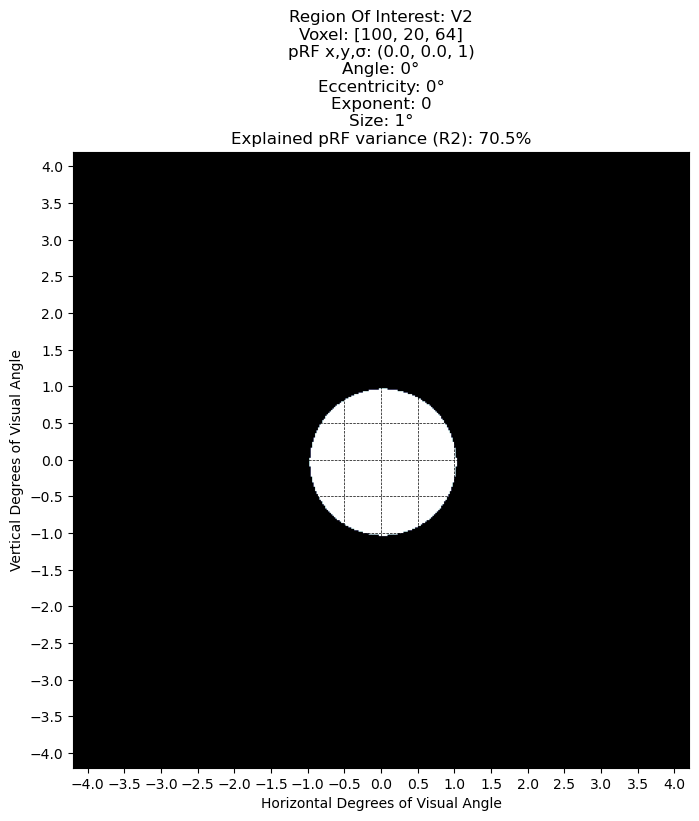

In [11]:
info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=0, sigma_max = 1.2, 
                                        ecc_max = 1, fill_outline = 'y', grid = 'y')


In [12]:
info['mask']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

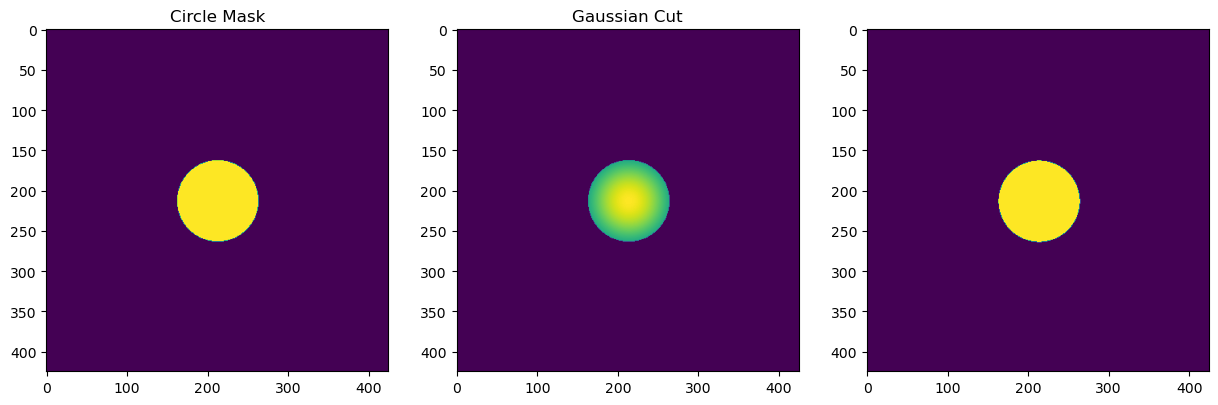

In [13]:
import matplotlib.pyplot as plt

# Assuming make_circle_mask and css_gaussian_cut are functions that return images

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image in the first subplot
axs[0].imshow(make_circle_mask(425, 213, 213, (425/8.4), fill='y', margin_width=0))
axs[0].set_title('Circle Mask')

# Plot the second image in the second subplot
axs[1].imshow(css_gaussian_cut(425, 213, 213, (425/8.4)))
axs[1].set_title('Gaussian Cut')

axs[2].imshow(info['mask'])

# Display the subplots
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [73]:
# This function applies a gaussian filter to the loaded image
def get_img_prf(image, x = None, y = None, sigma = None, type = 'gaussian', heatmask = None, 
                binary_masks = None, prf_proc_dict = None, roi = 'V1', sigma_min=1, sigma_max=25, ecc_max = 4.2,
                rand_seed = None, invert = 'n', central = 'n', filter_dict = None, grid = 'n', fill = 'y'):
    # arguments can be specified manually, or generated randomly if none are given
    # when entered manually there is no specification of parameters (yet)
    # I have to think about whether this is actually relevant, don't think so.
    # It's nothing more than a check whether it works, which it does.
    dim = image.shape[0]
    masked_arr = np.zeros(image.shape) # Create empty array for masked image
    if type == 'heatmask':
        # prf_mask = np.mean(heatmask, axis=2)
        prf_mask = heatmask
    else:
        if x is None and y is None and sigma is None:
            prf_info = get_mask(dim = dim, subject = 'subj01', plot = 'n', 
                                binary_masks = binary_masks, prf_proc_dict = prf_proc_dict, 
                                type = type, sigma_min=sigma_min, sigma_max=sigma_max, ecc_max = ecc_max,
                                rand_seed = rand_seed, filter_dict = filter_dict, grid = grid)

        
        x, y, sigma = prf_info['x'], prf_info['y'], prf_info['pix_radius']
        masked_arr = np.zeros(image.shape) # Create empty array for masked image

        pix_radius = sigma #* (image.shape[0]/8.4)
        
        if central == 'y':
            x = y = ((dim + 1) / 2)
            pix_radius = (ecc_max * (dim / 8.4))

            
        if type == 'gaussian':
            prf_mask = make_gaussian_2d(dim, x, y, pix_radius)
        elif type == 'circle':
            prf_mask = make_circle_mask(dim, x, y, pix_radius)
        elif type == 'full_gaussian':
            prf_mask = make_gaussian_2d(dim, x, y, pix_radius)
        elif type == 'cut_gaussian':
            prf_mask = css_gaussian_cut(dim, x, y, pix_radius)
        # elif type == 'outline':
        #     prf_mask = (make_circle_mask(image.shape[0], x, y, pix_radius, fill = 'n'))
        elif type == 'outline':
            dim = image.shape[0]
            x = y = ((dim + 2)/2)
            # x_deg = y_deg = prf_angle = prf_ecc = prf_expt = 0
            # deg_radius = prf_size = ecc_max
            prf_mask = (make_circle_mask(dim, ((dim+2)/2), ((dim+2)/2), ecc_max * (dim / 8.4), fill = fill))
        else:
            raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")

    # Apply the mask per layer of the input image using matrix multiplication
    for colour in range(image.shape[2]):
        if invert == 'n':
            masked_arr[:,:,colour] = image[:,:,colour] * prf_mask
        elif invert == 'y':
            masked_arr[:,:,colour] = image[:,:,colour] * (1 - prf_mask)
            

    # Normalize the masked image according to the RGB range of 0-255
    masked_img = masked_arr / 255

    # x, y = prf_info['x'].astype('int'), prf_info['y'].astype('int')
    # radius = prf_info['pix_radius'].astype('int')
    mask_w_in = prf_info['mask']
    
    # Create boolean mask of exact same size as weighted pRF patch
    rf_mask_in = make_circle_mask(425, x, y, sigma, fill = 'y', margin_width = 0)
    rms_contrast = get_rms_contrast(image,mask_w_in,rf_mask_in,normalise=True)
    # rms_contrast, weibull_pars, gray_image, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(image, center = center, radius = prf_info['pix_radius'].astype(int), hist = 'y', circ_plot = 'y')
    # sc, loc, ce = weibull_pars # Extract the spatial coherence (shape), location (on x-axis), and contrast energy (width, scale)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(masked_img, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
    ax.set_title(f'Region Of Interest: {roi}\n'
                f'Voxel: [{prf_info["x_vox"]}, {prf_info["y_vox"]}, {prf_info["z_vox"]}]\n'
                f'pRF x,y,σ: {round(prf_info["x_deg"], 1), round(prf_info["y_deg"], 1), round(prf_info["deg_radius"], 1)}\n'
                f'Angle: {round(prf_info["angle"], 2)}°\nEccentricity: {round(prf_info["eccentricity"], 2)}°\n'
                f'Exponent: {round(prf_info["exponent"], 2)}\nSize: {round(prf_info["size"], 2)}°\n'
                f'Explained pRF variance (R2): {round(prf_info["R2"], 2)}%\n'
                f'Root Mean Square (RMS) contrast of patch: {round(rms_contrast, 2)}')
                # f'Contrast Energy (CE) of patch (Weibull width): {round(ce, 2)}\n'
                # f'Spatial Coherence (SC) of patch (Weibull shape): {round(sc, 2)}\n'
                # f'Weibull location on x-axis: {round(loc, 2)}')
    ax.set_xlabel('Horizontal Degrees of Visual Angle')
    ax.set_ylabel('Vertical Degrees of Visual Angle')

    if grid == 'y':
        ax.grid(which='both', linestyle='--', linewidth=0.5, color='black')

    # Set ticks at every 0.1 step
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
    return prf_info, prf_mask, masked_arr, masked_img #, weibull_pars

36398


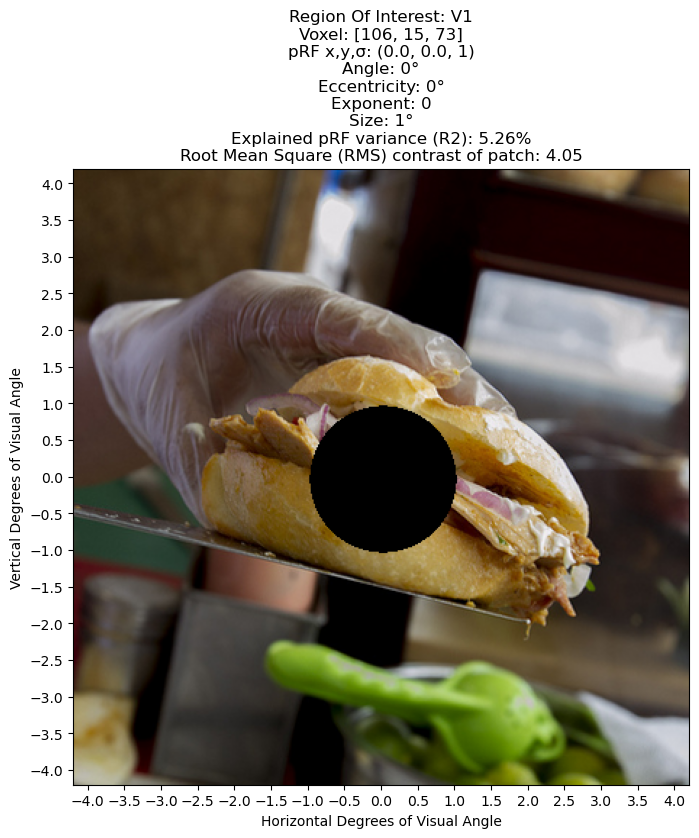

In [6]:
image, image_no = show_stim(hide='y')
print(image_no)
prf_details = get_img_prf(image, type='outline', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = 0.2, 
            sigma_max = 4.2, ecc_max = 1, rand_seed=None, invert='y', central = 'y', grid = 'n', fill= 'y'
            )



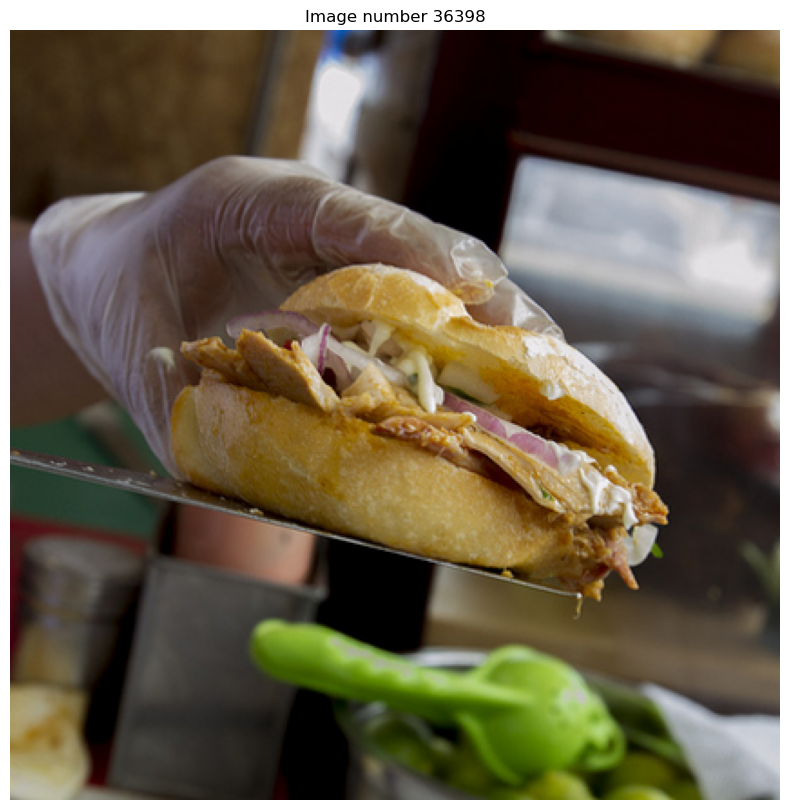

(array([[[ 61,  43,  19],
         [ 62,  44,  20],
         [ 61,  43,  19],
         ...,
         [154, 130,  96],
         [158, 135, 101],
         [160, 139, 108]],
 
        [[ 60,  42,  18],
         [ 59,  41,  17],
         [ 58,  40,  16],
         ...,
         [151, 127,  91],
         [155, 132,  98],
         [158, 138, 105]],
 
        [[ 60,  42,  18],
         [ 58,  40,  16],
         [ 57,  39,  15],
         ...,
         [150, 126,  90],
         [154, 130,  94],
         [157, 134, 100]],
 
        ...,
 
        [[165, 162, 145],
         [168, 166, 153],
         [173, 171, 156],
         ...,
         [135, 143, 145],
         [142, 152, 154],
         [152, 162, 164]],
 
        [[152, 149, 132],
         [156, 154, 141],
         [160, 158, 143],
         ...,
         [127, 135, 137],
         [135, 145, 147],
         [148, 158, 160]],
 
        [[136, 133, 118],
         [140, 138, 126],
         [144, 142, 127],
         ...,
         [121, 130, 129],
  

In [7]:
show_stim(img_no = image_no)

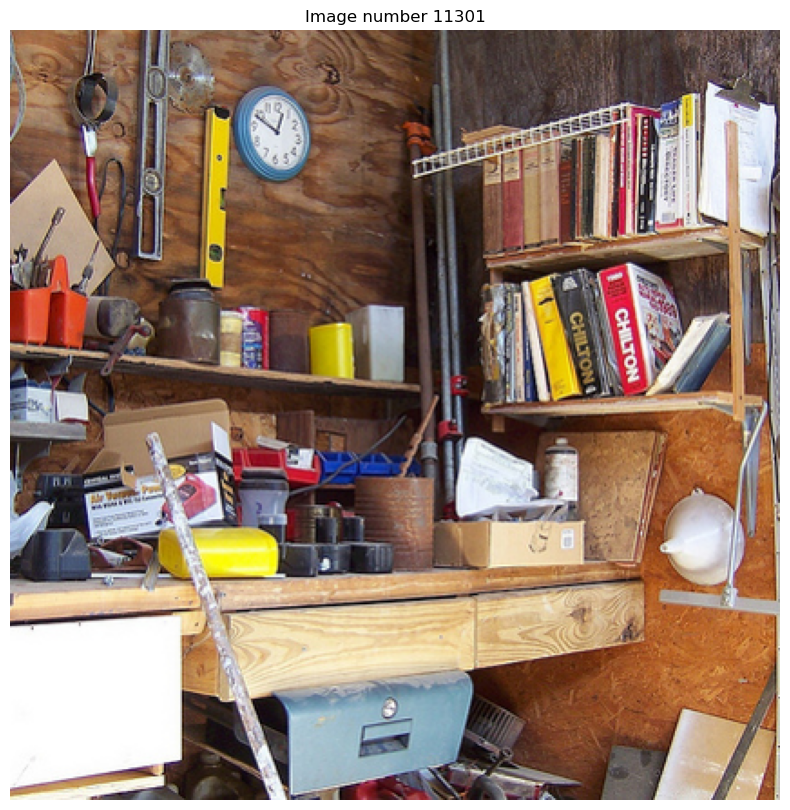

(array([[[139, 117, 106],
         [148, 109,  79],
         [140, 110,  76],
         ...,
         [ 88,  73,  78],
         [ 92,  78,  78],
         [ 83,  68,  65]],
 
        [[157, 139, 135],
         [129,  84,  61],
         [149, 106,  71],
         ...,
         [ 82,  68,  68],
         [ 94,  80,  79],
         [ 90,  75,  70]],
 
        [[144, 135, 138],
         [141,  94,  78],
         [155, 100,  64],
         ...,
         [ 98,  85,  79],
         [ 78,  64,  63],
         [ 86,  73,  65]],
 
        ...,
 
        [[189, 147,  87],
         [192, 157,  99],
         [207, 182, 125],
         ...,
         [228, 216, 178],
         [123, 117, 117],
         [206, 196, 187]],
 
        [[245, 241, 190],
         [246, 244, 203],
         [253, 253, 215],
         ...,
         [229, 220, 179],
         [163, 161, 149],
         [200, 187, 178]],
 
        [[244, 244, 210],
         [238, 240, 216],
         [237, 239, 217],
         ...,
         [220, 213, 171],
  

In [75]:
show_stim()

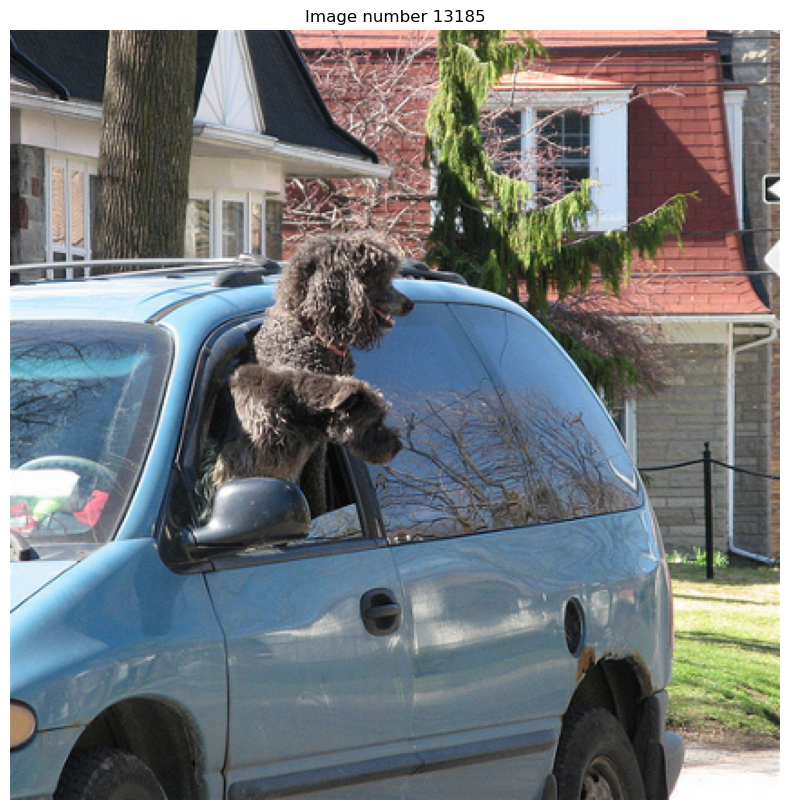

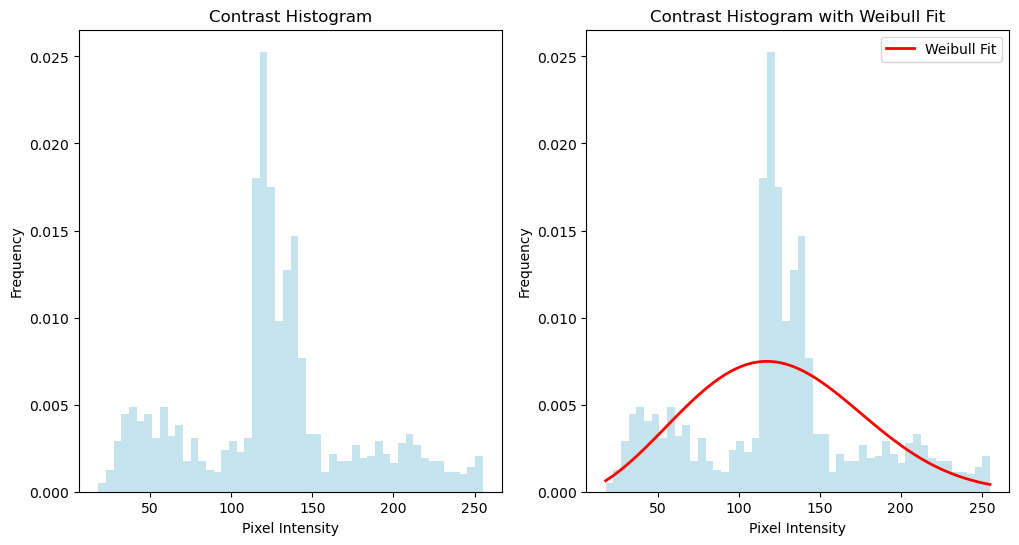

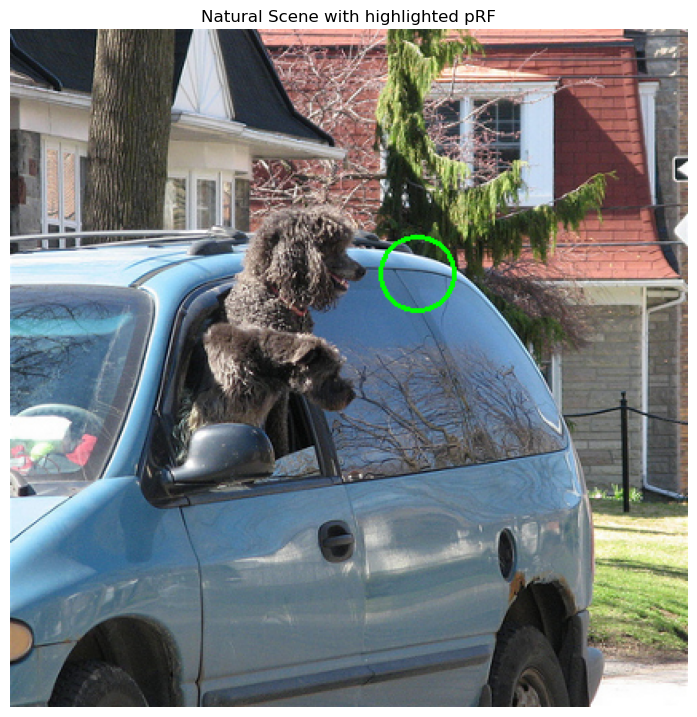

In [15]:
# center = (prf_details['x'].astype(int), prf_details['y'].astype(int))

# rms_contrast, weibull_params, image_with_circle, mask, patch_pixels, mean_intensity = calculate_rms_contrast_circle(image_array = show_stim()[0], center = center, radius = prf_details['pix_radius'].astype(int))